## Baseball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
# Let's import the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv("base_ball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape

(30, 17)

There are 200 Rows and 4 columns in this Data set

In [4]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Here we can see there is no missing values value.so we can proceed further

In [5]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Key Observations: 1) There is no much diffence between 50% and 'Min' values for most of the columns. There is large diffenrce between 75% and Max values for some of the columns. This shows there is posibilty of outliers in the above mentioned columns. 2) In some of the variables there is high standard deviation observed.

In [6]:
(data == 0).sum(axis=0)

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64

There is no value of 0 in the dataset.

# EDA

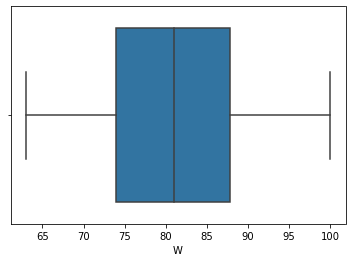

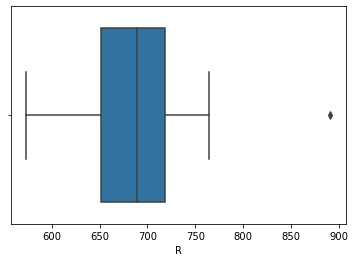

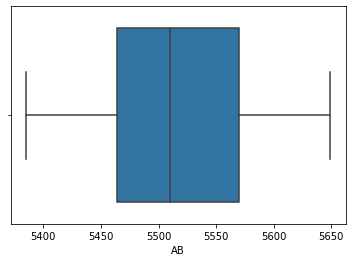

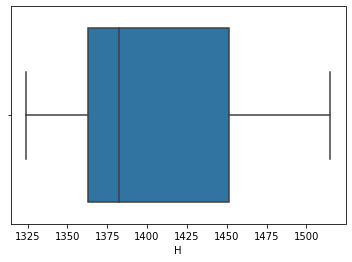

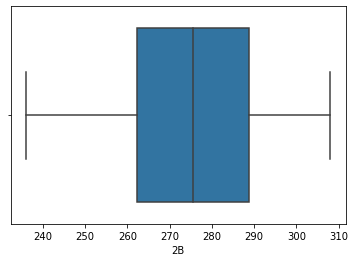

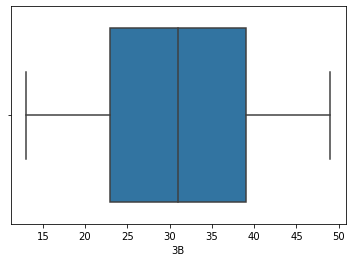

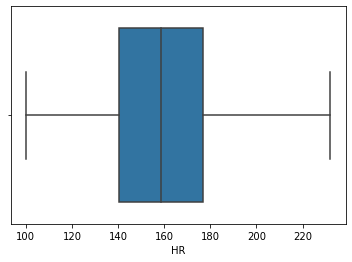

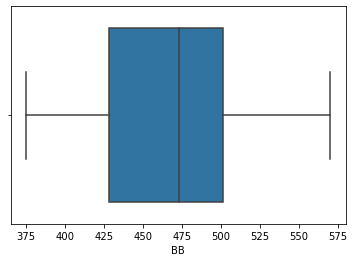

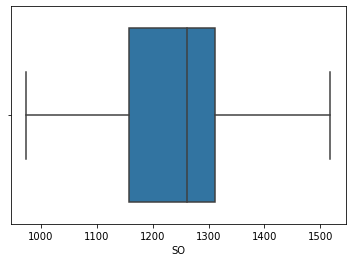

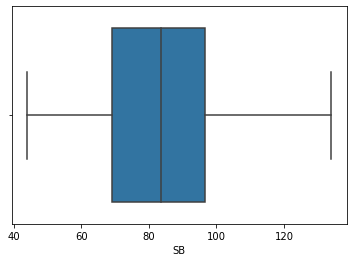

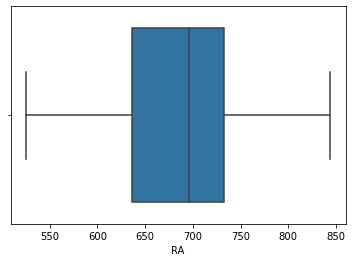

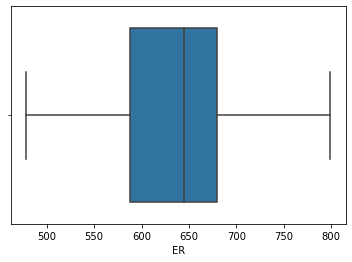

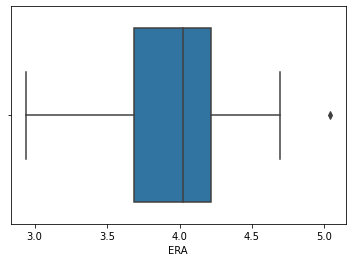

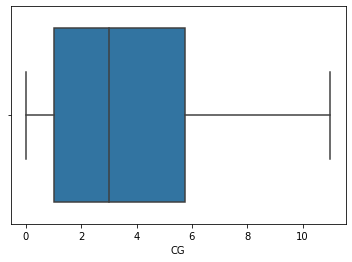

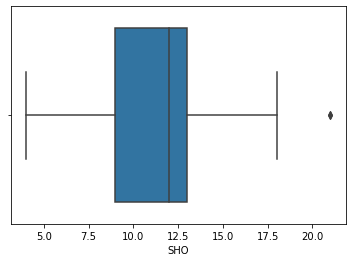

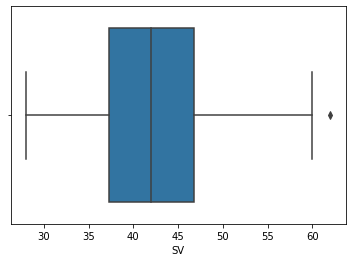

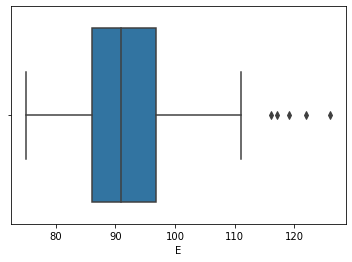

In [7]:
# ploting graph for alll the coulmns in one go
columns=["W", "R", "AB", "H","2B",'3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA','CG','SHO', 'SV', 'E']
for i in columns:
    sns.boxplot(data[i])
    plt.show()


We can depict from the above figure that there are outliers in some of the columns, however we are not going to remove from Target variable

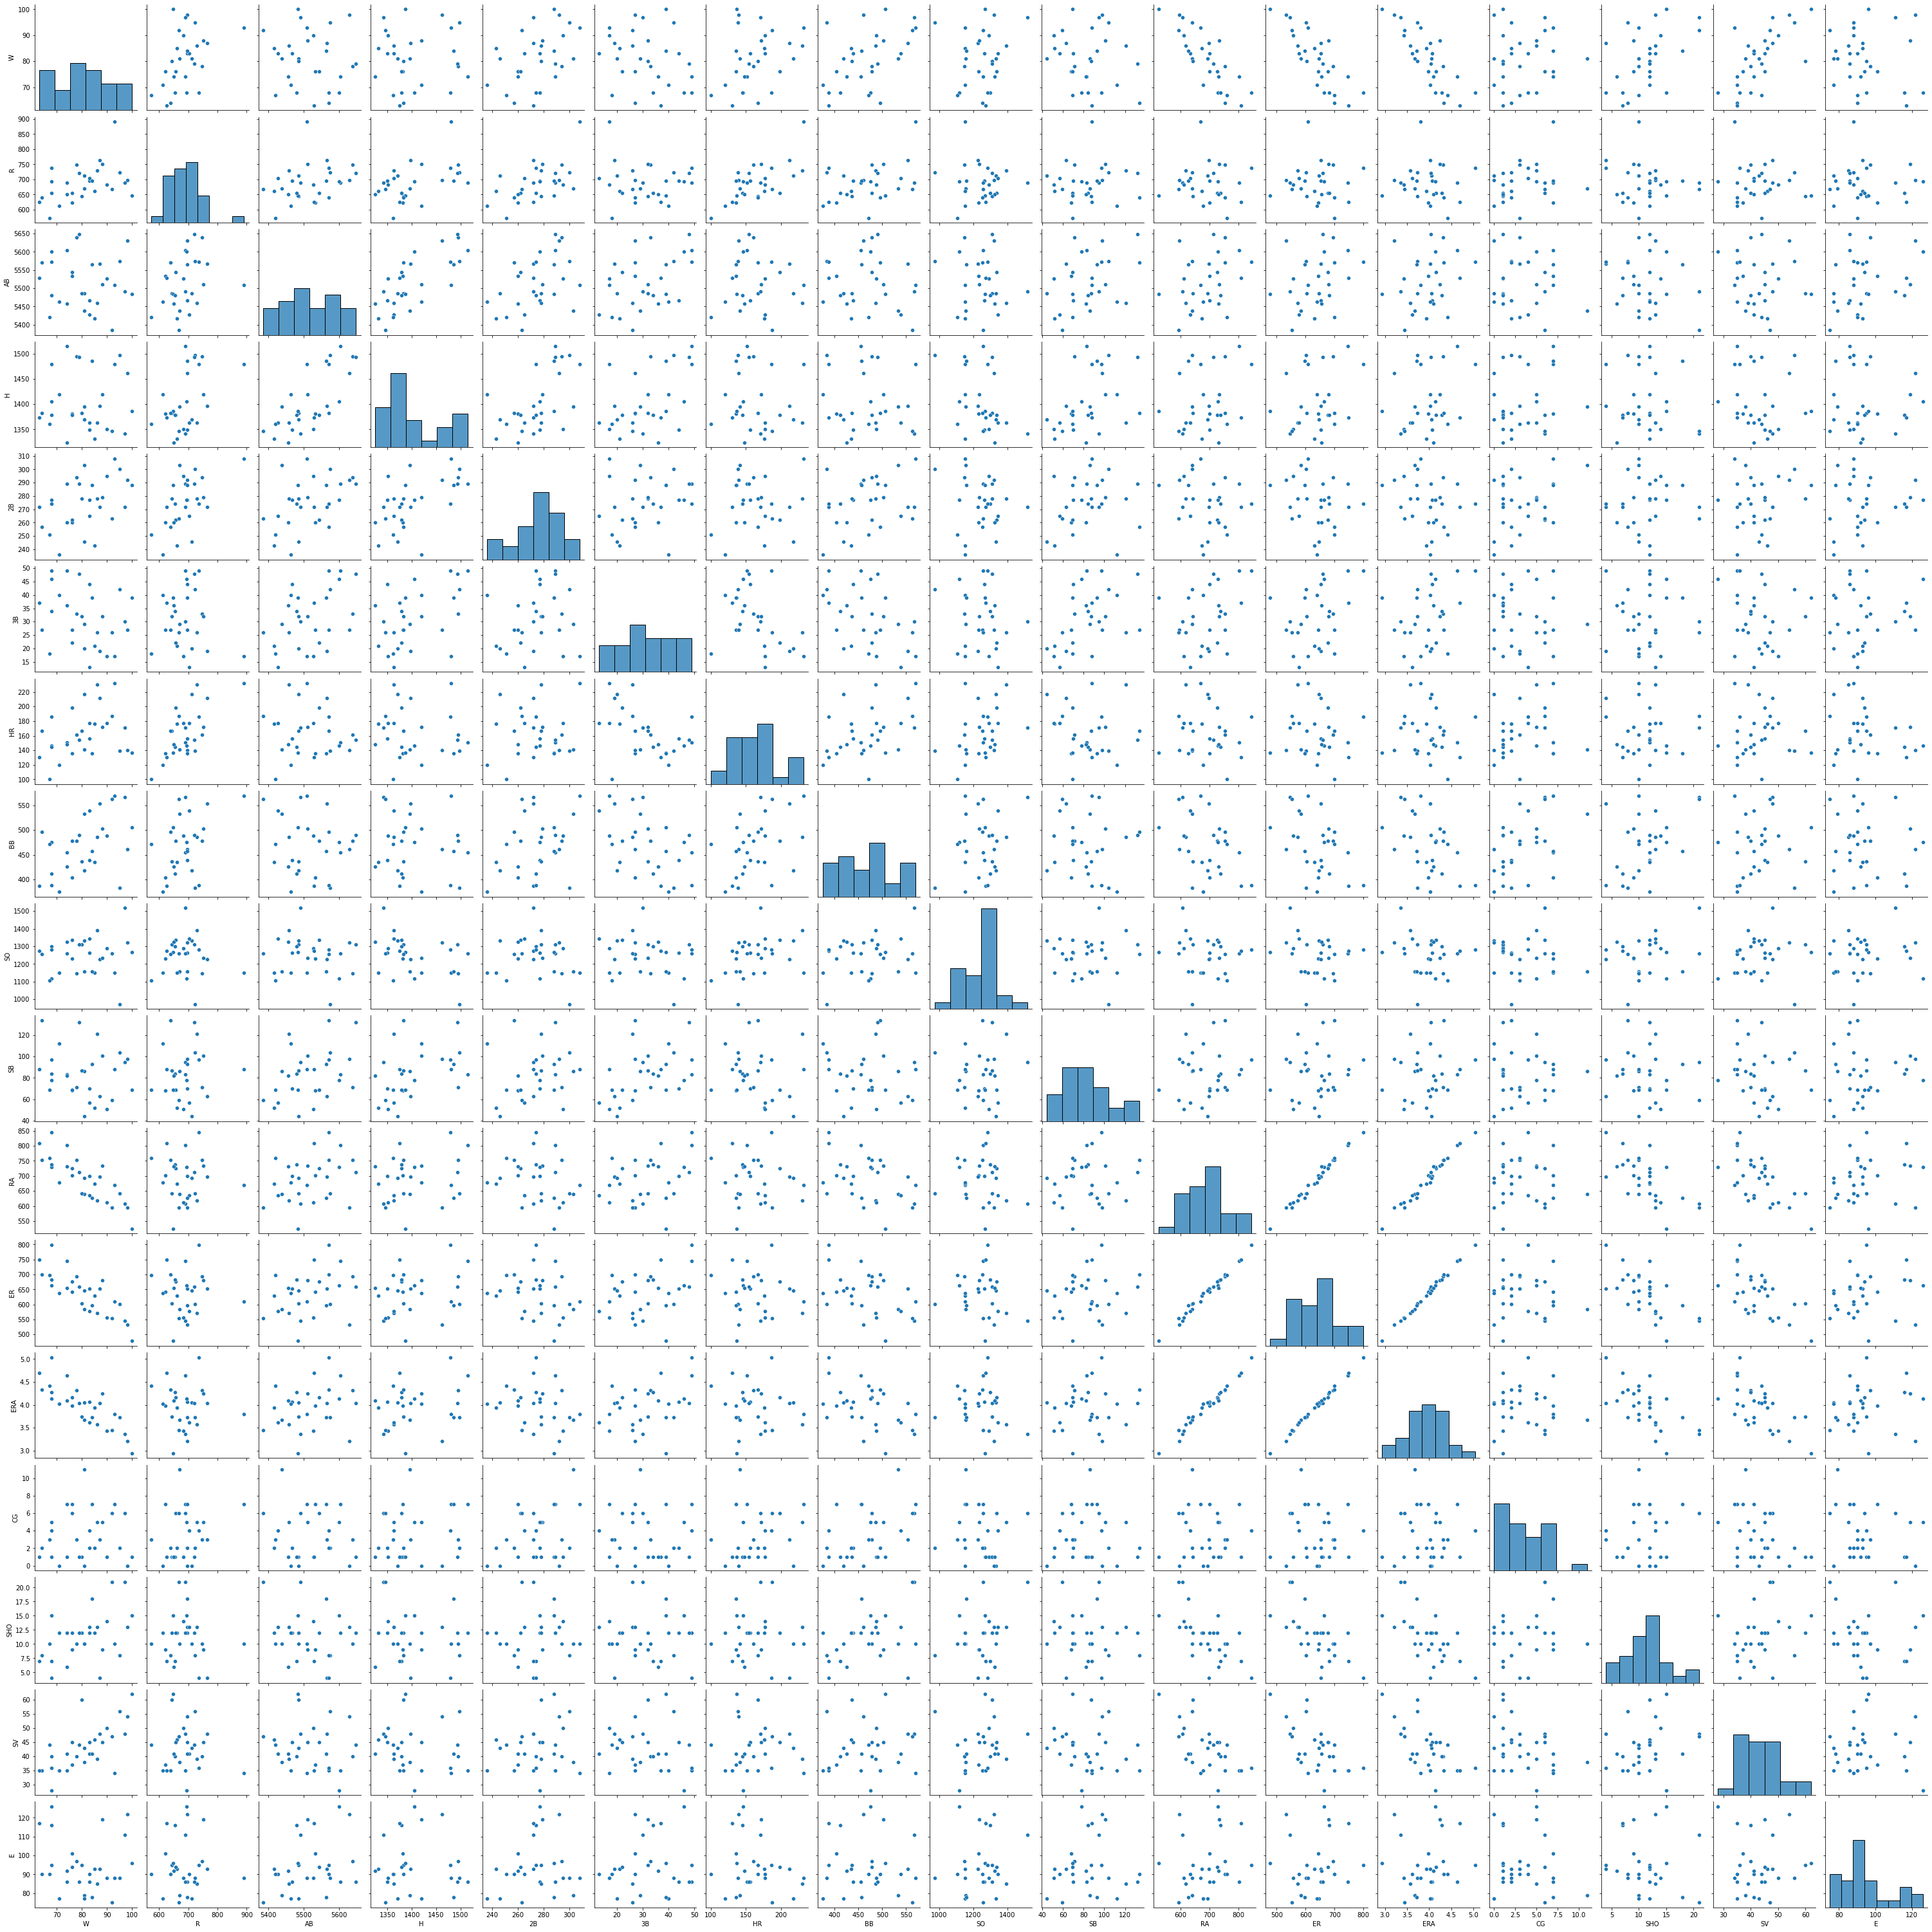

In [8]:
#Lets check the relationship of all the features with each other using pairplot
sns.pairplot(data)

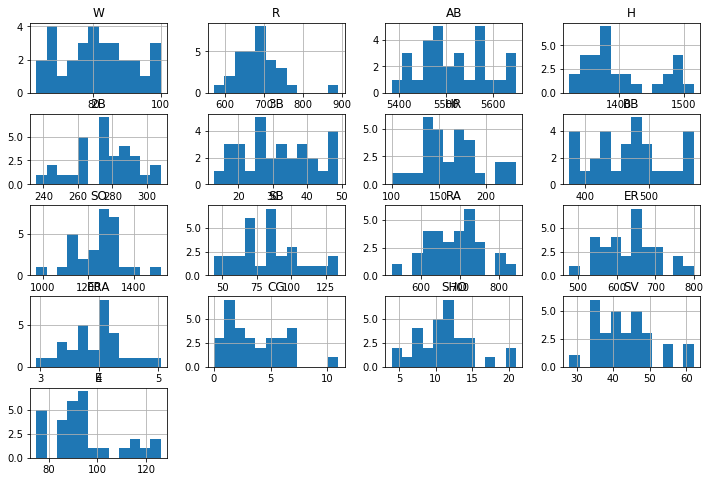

In [9]:
data.hist( bins = 12, figsize = (12,8))
plt.show()

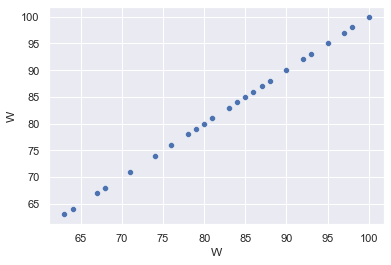

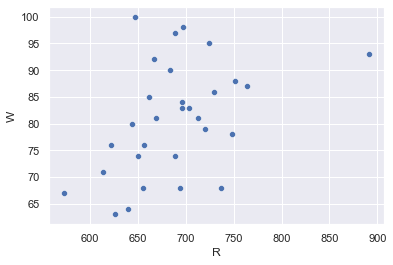

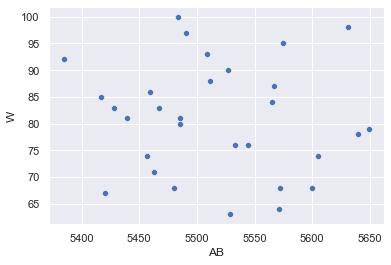

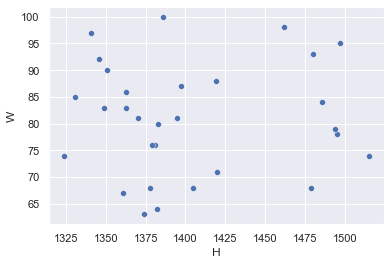

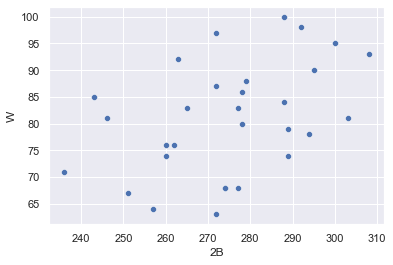

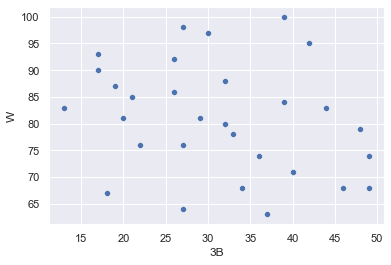

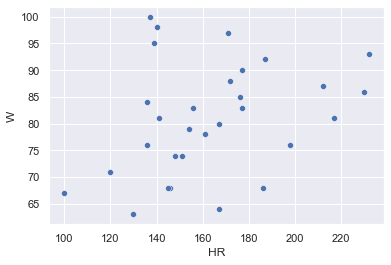

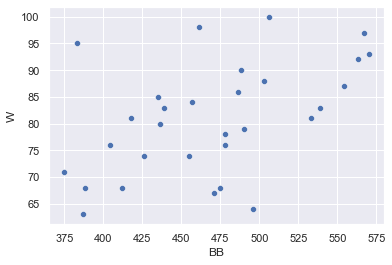

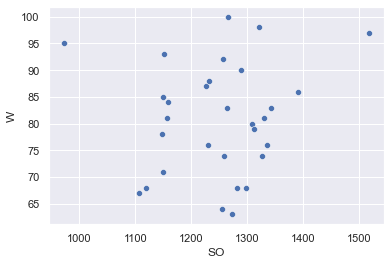

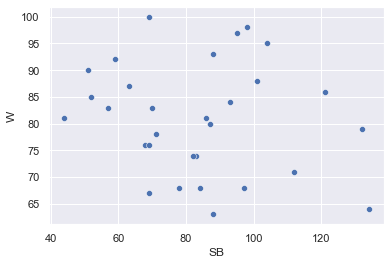

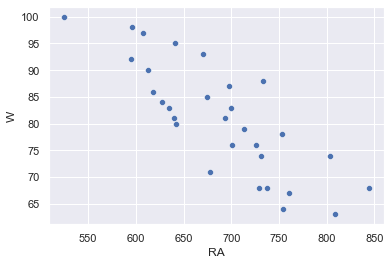

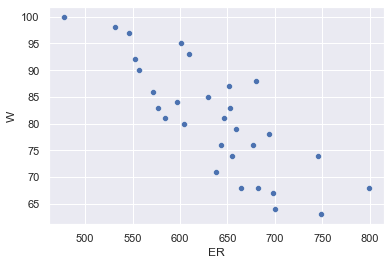

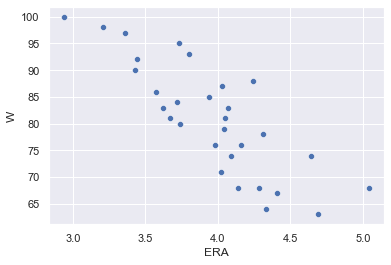

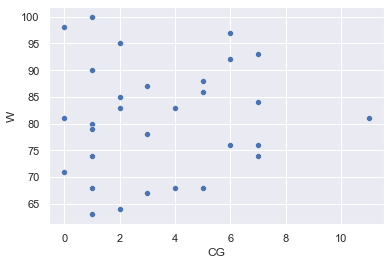

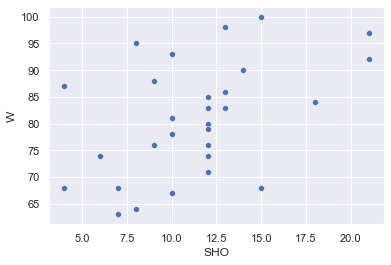

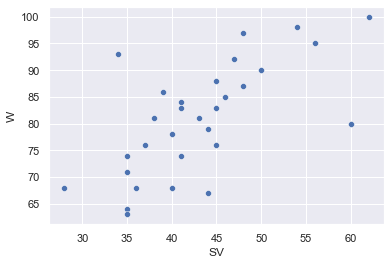

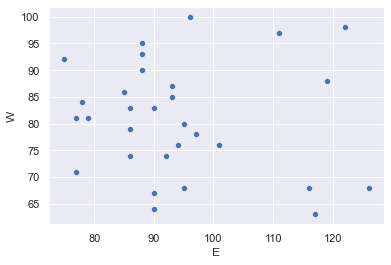

In [10]:
for i in columns:
    sns.set()
    sns.scatterplot(data=data,x=i,y='W')
    plt.show()

<AxesSubplot:>

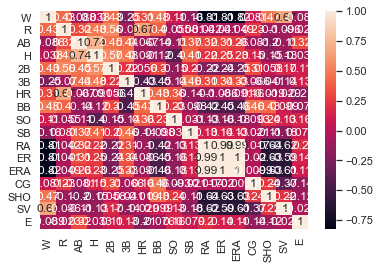

In [11]:
corr = data.corr()
sns.heatmap(corr,annot=True)

The heat plot shows that:

- ER, RA and ERA features are highly correlated among each other (almost 1)
- ER, RA and ERA features have strong negative correlation with respect to wins (W) (0.81)
- SV has decent correlation with W (Win) (0.67)

# Data Cleaning

Lets check for skewness now.

In [12]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Keeping the skewness range +0.5/-0.5, then we can see there are skweness in most of the columns. columns.Lets reduce the skewness from above features like: runs, Hits,Complete Games and Saves.

In [13]:
#Now we will remove the skewness

1 row was removed

In [15]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [16]:
for i in data.columns:
    if data[i].skew()>0.50:
        data[i]=np.log1p(data[i])

In [30]:
data.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR    -0.009528
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

## Normal Distribution Curve:

<AxesSubplot:xlabel='W', ylabel='Density'>

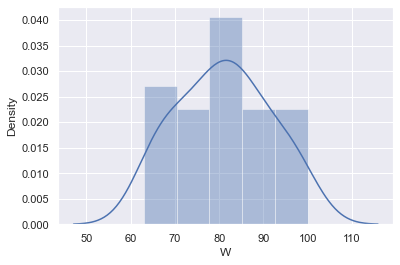

In [31]:
sns.distplot(data["W"])

<AxesSubplot:xlabel='R', ylabel='Density'>

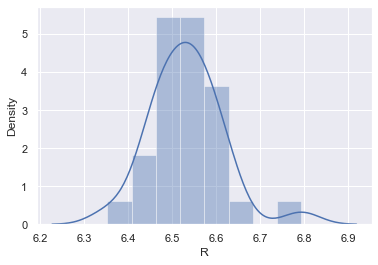

In [32]:
sns.distplot(data["R"])

<AxesSubplot:xlabel='AB', ylabel='Density'>

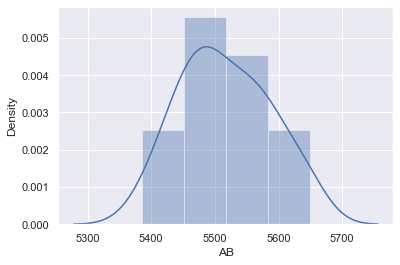

In [33]:
sns.distplot(data["AB"])

<AxesSubplot:xlabel='H', ylabel='Density'>

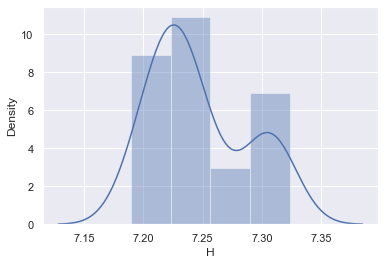

In [34]:
sns.distplot(data["H"])

<AxesSubplot:xlabel='2B', ylabel='Density'>

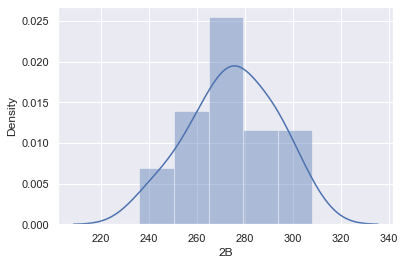

In [37]:
sns.distplot(data["2B"])

<AxesSubplot:xlabel='3B', ylabel='Density'>

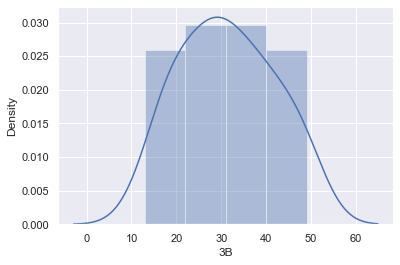

In [38]:
sns.distplot(data["3B"])

<AxesSubplot:xlabel='HR', ylabel='Density'>

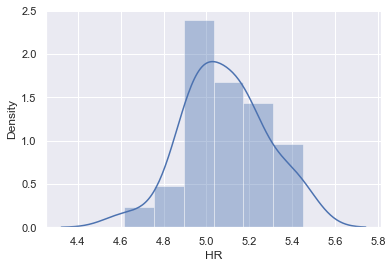

In [39]:
sns.distplot(data["HR"])

<AxesSubplot:xlabel='BB', ylabel='Density'>

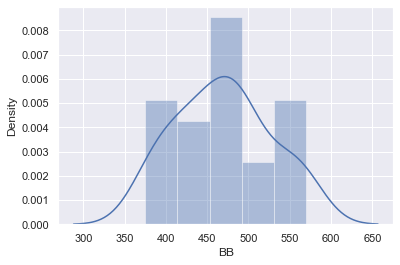

In [40]:
sns.distplot(data["BB"])

<AxesSubplot:xlabel='SO', ylabel='Density'>

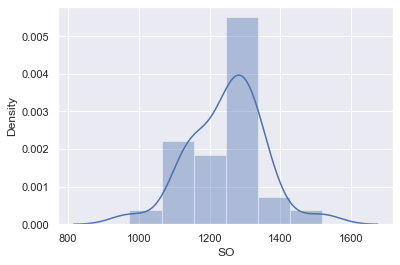

In [41]:
sns.distplot(data["SO"])

<AxesSubplot:xlabel='SB', ylabel='Density'>

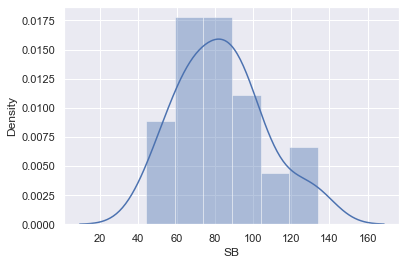

In [42]:
sns.distplot(data["SB"])

<AxesSubplot:xlabel='RA', ylabel='Density'>

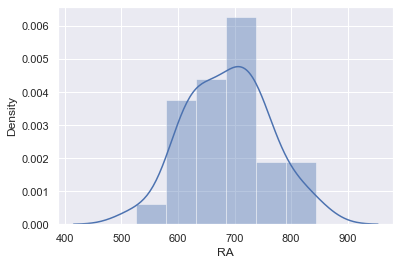

In [43]:
sns.distplot(data["RA"])

<AxesSubplot:xlabel='ER', ylabel='Density'>

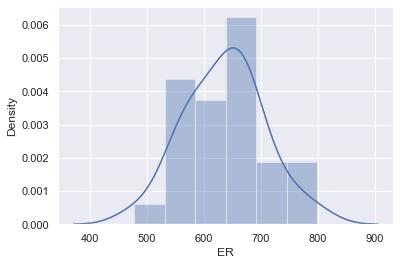

In [44]:
sns.distplot(data["ER"])

<AxesSubplot:xlabel='ERA', ylabel='Density'>

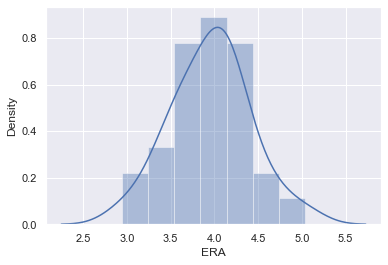

In [45]:
sns.distplot(data["ERA"])

<AxesSubplot:xlabel='CG', ylabel='Density'>

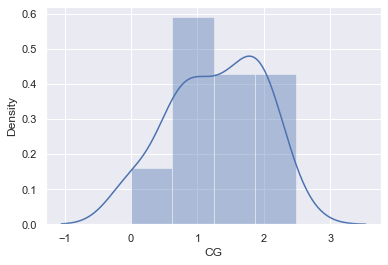

In [46]:
sns.distplot(data["CG"])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

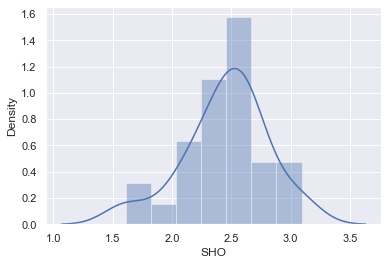

In [47]:
sns.distplot(data["SHO"])

<AxesSubplot:xlabel='SV', ylabel='Density'>

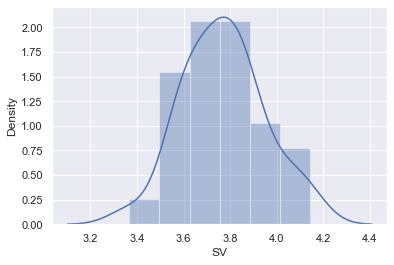

In [48]:
sns.distplot(data["SV"])

<AxesSubplot:xlabel='E', ylabel='Density'>

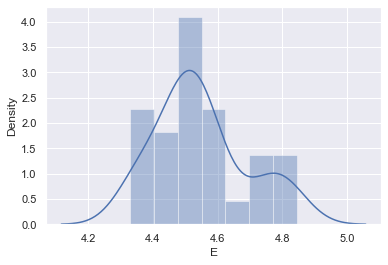

In [49]:
sns.distplot(data["E"])

In [50]:
#Now divide the dataset into target and features and we know that W is out target
X=data.drop('W',axis=1)
y=data[['W']]

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[ 0.66532946,  0.84773126,  1.64938177,  1.42017307,  1.04119304,
        -0.76397806, -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.50695519, -0.27892148, -0.72910756,  1.58127344,
        -0.42706021],
       [ 0.17956168, -0.71109353, -0.98165584,  0.12740339,  1.23580856,
        -0.15707687, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.25459752, -0.27892148,  0.32263825,  0.336185  ,
        -0.59169263],
       [-0.30770406, -1.1152333 , -0.13421019,  1.58879521, -0.22380785,
        -0.68886098,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.64134684,  1.76277761, -0.15516048, -0.62244106,
        -1.19928939],
       [-1.20472969,  0.24152162, -0.38913576, -0.82812203, -0.41842337,
        -0.8786901 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217,  0.05301004,  1.16561891, -0.42776132, -0.77328196,
         0.56049482],
       [ 0.05507026,  1.28073815,  1

### Split data into train and test

Model will be built on training data and testing to test data

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y,test_size=0.40,random_state=50)
Y_train.head()

,W
12,85
3,76
14,68
24,63
15,100


### Model Building & Evaluation

In [113]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
lm.score(X_train,Y_train)


0.9963920657302313

In [114]:
lm.coef_

array([[  6.10243418,  -5.43202762,   4.84867944,  -2.18202858,
          1.58254665,  -0.95400749,  -1.62183054,   1.55944769,
         -1.17616839,   4.60187012,   9.05159232, -20.05247462,
          1.94663738,  -1.20698643,   4.74882387,   1.80926915]])

In [115]:
lm.intercept_

array([81.73329088])

In [116]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pred=lm.predict(X_test)
print('Coefficient of determination',r2_score(Y_test,pred))
print('mean absolute Error',mean_absolute_error(Y_test,pred))
print('mean squarred Error',mean_squared_error(Y_test,pred))
print('Root mean square Error',np.sqrt(mean_squared_error(Y_test,pred)))

Coefficient of determination 0.6576316509465605
mean absolute Error 4.981593272476744
mean squarred Error 33.97768108557434
Root mean square Error 5.829037749541029


In [117]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor()
dc.fit(X_train,Y_train)
dc.score(X_train,Y_train)

1.0

In [118]:
from sklearn.metrics import r2_score
pred=dc.predict(X_test)
print('Coefficient of determination',r2_score(Y_test,pred))
print('mean absolute error',mean_absolute_error(Y_test,pred))
print('mean squarred error',mean_squared_error(Y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(Y_test,pred)))

Coefficient of determination 0.07634175355118611
mean absolute error 7.833333333333333
mean squarred error 91.66666666666667
Root mean square error 9.574271077563381


In [119]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)

0.7224481938625298

In [120]:
from sklearn.metrics import r2_score
pred=kn.predict(X_test)
print('Coefficient of determination',r2_score(Y_test,pred))
print('mean absolute error',mean_absolute_error(Y_test,pred))
print('mean squarred error',mean_squared_error(Y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(Y_test,pred)))

Coefficient of determination 0.4607515219368834
mean absolute error 6.516666666666667
mean squarred error 53.51666666666667
Root mean square error 7.315508640324791


In [121]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)

0.9195888574340392

In [122]:
from sklearn.metrics import r2_score
pred=rf.predict(X_test)
print('Coefficient of determination',r2_score(Y_test,pred))
print('mean absolute error',mean_absolute_error(Y_test,pred))
print('mean squarred error',mean_squared_error(Y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(Y_test,pred)))

Coefficient of determination 0.5798611153873066
mean absolute error 5.158333333333334
mean squarred error 41.69586666666669
Root mean square error 6.457233669820745


In [123]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(X_train,Y_train)
sv.score(X_train,Y_train)

0.20234470004487048

In [124]:
from sklearn.metrics import r2_score
pred=sv.predict(X_test)
print('Coefficient of determination',r2_score(Y_test,pred))
print('mean absolute error',mean_absolute_error(Y_test,pred))
print('mean squarred error',mean_squared_error(Y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(Y_test,pred)))

Coefficient of determination 0.07162523215002103
mean absolute error 8.175550627019932
mean squarred error 92.13474866211146
Root mean square error 9.598684736051677


From the above model we can conceive that Linear Regression Model is the best model for predicting the Win

### Improving the model accuracy using cross Validation

In [125]:
from sklearn.model_selection import cross_val_score
gnbscores =cross_val_score(lm,X,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[ 0.73039703 -3.23159093  0.56339016  0.67638771  0.19955704]
-0.21237179607630222 1.520913058901442


In [126]:
from sklearn.model_selection import cross_val_score
dcscores =cross_val_score(dc,X,y,cv=5)
print(dcscores)
print(dcscores.mean(),dcscores.std())

[-1.56305506 -8.60687023 -0.64737243  0.35384615  0.42485207]
-2.007719899174634 3.3790962621389373


In [127]:
from sklearn.model_selection import cross_val_score
knscores =cross_val_score(kn,X,y,cv=5)
print(knscores)
print(knscores.mean(),knscores.std())

[-0.3435524  -3.26229008  0.01340442 -0.37368917  0.74061538]
-0.6451023680398237 1.3688034107630993


In [128]:
from sklearn.model_selection import cross_val_score
rfscores =cross_val_score(rf,X,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[ 0.21285835 -4.94666527  0.20557715  0.37405608  0.71369615]
-0.68809550765598 2.1372398516000843


In [111]:
from sklearn.model_selection import cross_val_score
svscores =cross_val_score(sv,X,y,cv=5)
print(svscores)
print(svscores.mean(),rfscores.std())

[-0.16031235 -0.76367821 -0.31858085 -0.75246018 -0.29917691]
-0.4588416988148043 1.931385962030983


### HyperParameter tuning Using GSCV

In [67]:
from sklearn.model_selection import GridSearchCV 
parameter={'n_jobs':np.arange(1,15),'fit_intercept':['True', 'False']}

In [68]:
GSCV=GridSearchCV(LinearRegression(),parameter,cv=5)

In [69]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'],
                         'n_jobs': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [70]:
GSCV.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [71]:
lm_final=LinearRegression(n_jobs=1,fit_intercept='True')
lm_final.fit(X_train,Y_train)
lm_final.score(X_train,Y_train)

0.9736548495796162

In [77]:
from sklearn.metrics import r2_score
pred=lm_final.predict(X_test)
score= cross_val_score(lm_final,X,y,cv=5)
print('Coefficient of determination',r2_score(Y_test,pred))
print('Cross Validation Score',score)
print('mean absolute error',mean_absolute_error(Y_test,pred))
print('mean squarred error',mean_squared_error(Y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(Y_test,pred)))

Coefficient of determination 0.3096320080237348
Cross Validation Score [ 0.73039703 -3.23159093  0.56339016  0.67638771  0.19955704]
mean absolute error 4.294343099035762
mean squarred error 23.116540731330254
Root mean square error 4.8079663820923555


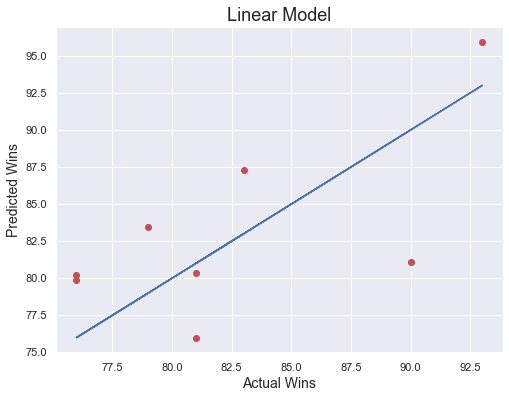

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(x=Y_test,y=pred,color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Linear Model',fontsize=18)
plt.show()

### Save the model and later we can use it for prediction

In [ ]:
#Saving the model to the local file system:
import pickle


In [ ]:
filename='baseball.pickle'
pickle.dump(lm_final,open(filename,'wb'))